# Shuffling Method

Inspired by [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers) by Jake VanderPlas

Let's say you have 2 sets of test scores:  
    
    84, 72, 57, 46, 63, 76, 99, 91 
    
and  
    
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69  
    
The mean of the first set of test scores is 73.5 and the mean of the second set of test scores is 66.9.  
The difference between the 2 means is 6.58.

Is this difference statistically significant?

## The following is my attempt at applying the shuffling method using Python programming language

In [1]:
# embed the matplotlib charts within this jupyter notebook
%matplotlib inline
import numpy as np               # library to allow us to use vectorized data structures and has useful stats functions
import matplotlib.pyplot as plt  # plotting library

test1 = [
    84, 72, 57, 46, 63, 76, 99, 91
]

test2 = [
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69
]

test_scores1 = np.array(test1)
test_scores2 = np.array(test2)

### Mean from test scores set 1:

In [4]:
test_scores1.mean()

73.5

### Mean from test scores set 2:

In [5]:
test_scores2.mean()

66.916666666666671

In [6]:
diff = test_scores1.mean() - test_scores2.mean()
diff

6.5833333333333286

### Is the difference in the means statistically significant?

## Let's apply the shuffling method

### Create draw space from which we will sample data from which consists of both test scores

In [7]:
combined = np.concatenate((test_scores1, test_scores2))

### Let's double-check that the list has what we want

In [8]:
combined

array([84, 72, 57, 46, 63, 76, 99, 91, 81, 69, 74, 61, 56, 87, 69, 65, 66,
       44, 62, 69])

### We need to shuffle the values in the combined array

In [9]:
help(np.random.shuffle)

Help on built-in function shuffle:

shuffle(...) method of mtrand.RandomState instance
    shuffle(x)
    
    Modify a sequence in-place by shuffling its contents.
    
    Parameters
    ----------
    x : array_like
        The array or list to be shuffled.
    
    Returns
    -------
    None
    
    Examples
    --------
    >>> arr = np.arange(10)
    >>> np.random.shuffle(arr)
    >>> arr
    [1 7 5 2 9 4 3 6 0 8]
    
    This function only shuffles the array along the first index of a
    multi-dimensional array:
    
    >>> arr = np.arange(9).reshape((3, 3))
    >>> np.random.shuffle(arr)
    >>> arr
    array([[3, 4, 5],
           [6, 7, 8],
           [0, 1, 2]])



### Now, we'll draw shuffled numbers from combined array list

In [16]:
length = len(test_scores1)
diff_means = np.array([])   # array that will contain the difference in the means

# perform the following 10000 times where we draw random test values from the combined list
# and calculate the difference between the means, then add/append the differnce to the diff_means array
for i in range(0,10000):
    np.random.shuffle(combined)
    diff_means = np.append(diff_means, combined[:length].mean() - combined[length:].mean())

### Create a histogram of the difference in the means along with a vertical red line where the stated difference lies on the x-axis (6.58)

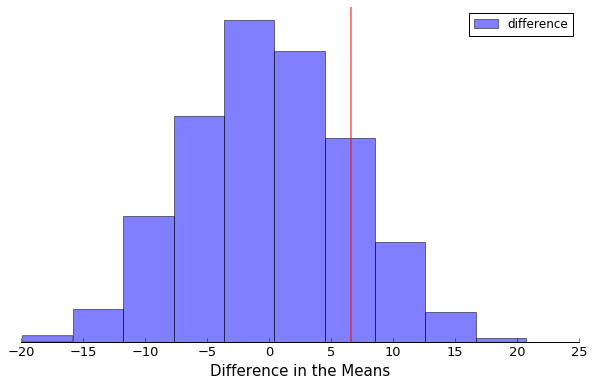

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(diff_means, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.axvline(diff, linewidth=2, alpha=0.5, color='red')
plt.show()

In [20]:
# obtain all observations greater than or equal to the stated difference
gt_diff = diff_means[diff_means >= diff]

# calculate portion of differences that are greater than or equal to the stated difference
p = len(gt_diff) / 10000

# print results
print('Out of 10,000 samples, the probability that the difference in the means is >= ' + 
      "{0:.2f}".format(diff) + ' is ' + str(p))

Out of 10,000 samples, the probability that the difference in the means is >= 6.58 is 0.1663


Since the simulated probability that the difference in the means will be greater than or equal to 6.58 is greater than 0.05, the difference in the means of the 2 sets of test scores is **NOT** significant.  In other words, there is a probability of more than 16% that the difference in the means will be greater than or equal to 6.58.  We want it to be less tha 5% to be considered statistically "significant".

# Calculating 90% Confidence Interval for the Difference In the Means

We'll use numpy's handy percentile() method to calculate 90% confidence interval

In [21]:
np.percentile(diff_means, [5, 95])

array([-10.5 ,  10.75])

In [29]:
lower_bound = np.percentile(diff_means, [5, 95])[0]  # get first element for lower bound
upper_bound = np.percentile(diff_means, [5, 95])[1]  # get second element for upper bound

### Let's double-check the lower and upper bound values

In [30]:
lower_bound

-10.5

In [31]:
upper_bound

10.75

### Now we're ready to plot!

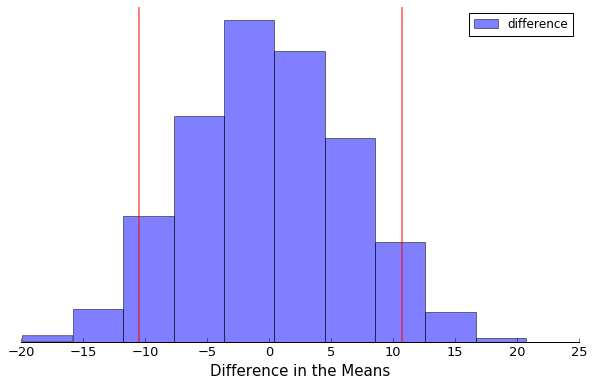

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(diff_means, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.axvline(lower_bound, linewidth=2, alpha=0.5, color='red')
plt.axvline(upper_bound, linewidth=2, alpha=0.5, color='red')
plt.show()

In [28]:
print('With 90% confidence, the true difference in the means will fall between ' + 
      "{0:.2f}".format(lower_bound) + ' and ' + "{0:.2f}".format(upper_bound))

With 90% confidence, the true difference in the means will fall between -10.50 and 10.75
